# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402
5,4.231065,3.433002
6,9.807642,9.837325
7,6.848297,7.917613
8,4.809319,5.700025
9,3.921175,5.676061


In [2]:
# a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial

# Criando os vetores para cálculo da média e da diferença
mean_vector = np.array([0.5, 0.5])
diff_vector = np.array([1, -1])

# Calculando a média e a diferença para cada par de valores em p1 e p2
means = df.dot(mean_vector)
differences = df.dot(diff_vector)

# Adicionando os resultados ao DataFrame
df['mean'] = means
df['difference'] = differences

df

,p1,p2,mean,difference
0,6.964692,7.943428,7.454060,-0.978736
1,2.861393,5.099537,3.980465,-2.238143
2,2.268515,0.974429,1.621472,1.294085
3,5.513148,4.474359,4.993754,1.038788
4,7.194690,8.938402,8.066546,-1.743712
5,4.231065,3.433002,3.832033,0.798063
6,9.807642,9.837325,9.822484,-0.029683
7,6.848297,7.917613,7.382955,-1.069316
8,4.809319,5.700025,5.254672,-0.890706
9,3.921175,5.676061,4.798618,-1.754886


In [3]:
# b) Calcule a correlação entre os dados da p1 e p2

# Calculando a correlação entre p1 e p2
correlation = df[['p1', 'p2']].corr()
correlation

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [4]:
# c) Calcule a correlação entre os dados transformados (média e diferença)

# Calculando a correlação entre as colunas 'mean' e 'difference'
transformed_correlation = df[['mean', 'difference']].corr()
transformed_correlation

,mean,difference
mean,1.000000,-0.133474
difference,-0.133474,1.000000


In [5]:
# d) Comente as correlações observadas.

As correlações observadas revelam insights interessantes sobre as relações entre os diferentes conjuntos de dados:

1. **Correlação entre `p1` e `p2` (Aprox. 0.896):**
   - Esta é uma correlação positiva forte. Como `p2` foi gerado a partir de `p1` com a adição de um ruído normal, era esperado que os dois conjuntos de dados estivessem fortemente relacionados. A correlação alta indica que, na maioria dos casos, um aumento em `p1` corresponde a um aumento em `p2` e vice-versa. Isso reflete a dependência direta de `p2` sobre `p1`.

2. **Correlação entre 'mean' e 'difference' (Aprox. -0.133):**
   - Esta é uma correlação negativa fraca. A média (`mean`) é calculada como o ponto médio entre `p1` e `p2`, enquanto a diferença (`difference`) reflete o desvio entre esses dois valores. Uma correlação negativa fraca sugere que, em alguns casos, um aumento na média pode corresponder a uma pequena diminuição na diferença, mas este relacionamento não é forte nem consistente. Isso faz sentido, pois a média e a diferença são derivadas das mesmas variáveis de maneiras diferentes e, portanto, qualquer relação entre elas não é direta, mas sim um artefato da maneira como os dados foram transformados.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

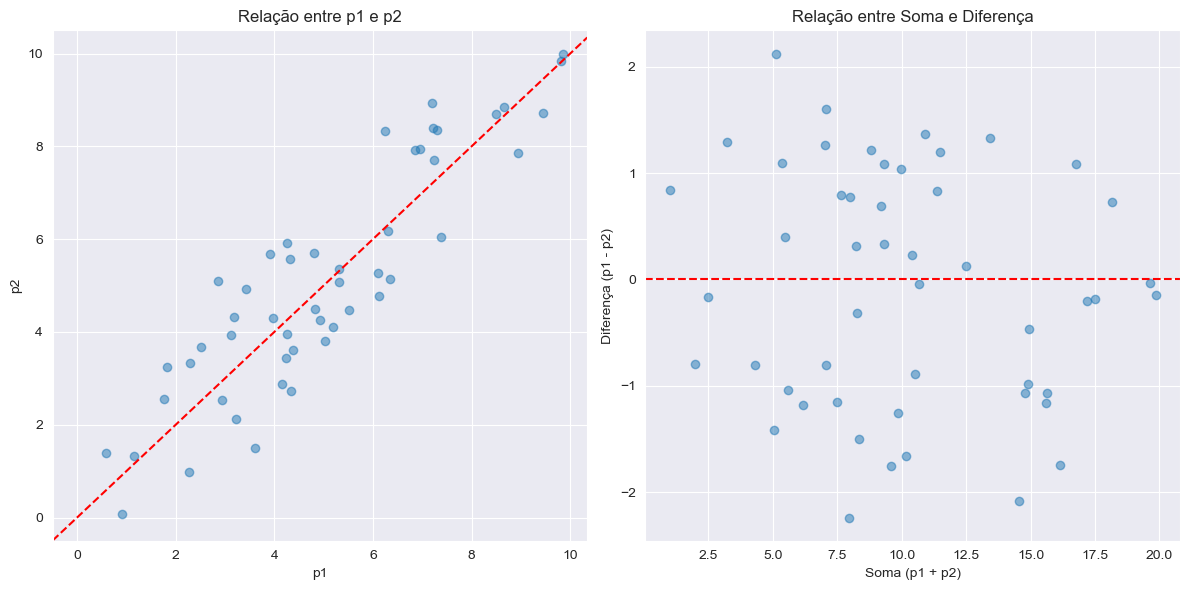

In [6]:
# Calculando a soma de p1 e p2
df['sum'] = df['p1'] + df['p2']

# Criando um gráfico de dispersão para comparar as transformações
plt.figure(figsize=(12, 6))

# Gráfico para a média
plt.subplot(1, 2, 1)
plt.scatter(df['p1'], df['p2'], alpha=0.5)
plt.title('Relação entre p1 e p2')
plt.xlabel('p1')
plt.ylabel('p2')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Linha y=x para referência

# Gráfico para a soma
plt.subplot(1, 2, 2)
plt.scatter(df['sum'], df['difference'], alpha=0.5)
plt.title('Relação entre Soma e Diferença')
plt.xlabel('Soma (p1 + p2)')
plt.ylabel('Diferença (p1 - p2)')
plt.axhline(y=0, color='red', linestyle='--')  # Linha horizontal para referência

plt.tight_layout()
plt.show()


1. **Relação entre p1 e p2:**
   - Este gráfico mostra a relação direta entre `p1` e `p2`. A linha vermelha tracejada representa a linha y = x, onde `p1` e `p2` seriam iguais. A distribuição dos pontos em torno desta linha indica a relação entre `p1` e `p2`, com a maioria dos pontos caindo perto dela, refletindo a forte correlação positiva.

2. **Relação entre Soma e Diferença:**
   - Este gráfico compara a soma de `p1` e `p2` com a diferença entre eles. A linha horizontal vermelha tracejada indica onde a diferença é zero (ou seja, onde `p1` e `p2` são iguais). Os pontos estão dispersos de forma que não indicam uma correlação clara entre a soma e a diferença. Isto é consistente com a correlação fraca observada anteriormente.

Diferentes transformações podem revelar diferentes aspectos da relação entre os dados.